In [12]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\ricardo\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages (from -r requirements.txt (line 1)) (2.0.3)
                                              0.0/152.1 kB ? eta -:--:--
     ---------------                         61.4/152.1 kB 1.1 MB/s eta 0:00:01
     ----------------------------           112.6/152.1 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 152.1/152.1 kB 1.3 MB/s eta 0:00:00




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Ricardo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### We embark on a journey into the world of NIPS (Neural Information Processing Systems) conference, a prestigious annual event in the machine learning community. Our mission involves analyzing a vast collection of research papers published at NIPS conferences spanning an impressive 30-year period from 1987 to 2017. With over 50,000 PDF files automatically processed, we have curated a comprehensive dataset on diverse machine learning techniques. From neural networks to optimization methods and beyond, these NIPS papers offer invaluable insights into the evolution of machine learning over the years. Get ready to explore this treasure trove of knowledge and uncover the trends that have shaped the future of AI! 


##### First, we will explore the CSV file to determine what type of data we can use for the analysis and how it is structured. A research paper typically consists of a title, an abstract and the main text. Other data such as figures and tables were not extracted from the PDF files. Each paper discusses a novel technique or improvement. In this analysis, we will focus on analyzing these papers with natural language processing methods.

In [13]:
# Importing modules
import pandas as pd

# Read datasets/papers.csv into papers
papers = pd.read_csv('papers.csv')

# Print out the first rows of papers
print(papers.head())

     id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATI

#### Preparing Data

#### Removing the columns id, event_type and pdf_name

In [14]:
columns_to_remove = ['id', 'event_type', 'pdf_name']
papers = papers.drop(columns=columns_to_remove)
print(papers.head())

   year                                              title          abstract  \
0  1987  Self-Organization of Associative Database and ...  Abstract Missing   
1  1987  A Mean Field Theory of Layer IV of Visual Cort...  Abstract Missing   
2  1988  Storing Covariance by the Associative Long-Ter...  Abstract Missing   
3  1994  Bayesian Query Construction for Neural Network...  Abstract Missing   
4  1994  Neural Network Ensembles, Cross Validation, an...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...  
1  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...  
2  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...  
3  Bayesian Query Construction for Neural\nNetwor...  
4  Neural Network Ensembles, Cross\nValidation, a...  


#### Check distribution

In [15]:
# Group the papers by year
groups = papers.groupby(['year'])

# Size of the groups of years
count = groups.size()
print(count.head())

year
1987     90
1988     94
1989    101
1990    143
1991    144
dtype: int64


#### Plot Distribution

<Axes: xlabel='year'>

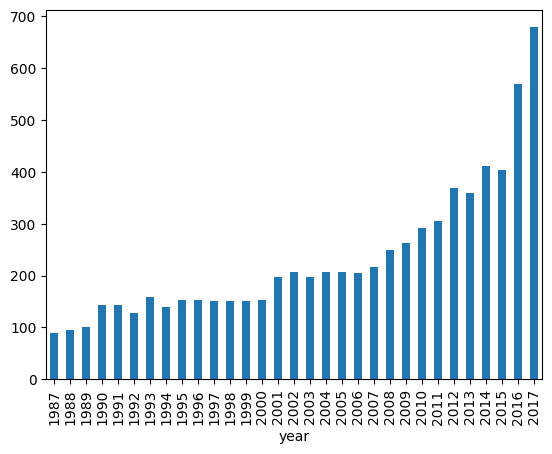

In [16]:
import matplotlib.pyplot as plt
count.plot(kind='bar')

#### Preprocessing the text data

##### To identify trends in machine learning research, we start by preprocessing the titles to prepare them for analysis. The following steps are applied:

##### Removing Punctuation: We use a regular expression to eliminate any punctuation marks, making the titles more consistent for analysis.


In [17]:
import re
print(papers['title'].head())


0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


##### Lowercasing: To ensure case-insensitive analysis, all titles are converted to lowercase.

In [18]:
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))
papers['title_processed'] = papers['title_processed'].str.lower()
print(papers['title_processed'].head())

0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object


#### Using word cloud for visualization of text data 

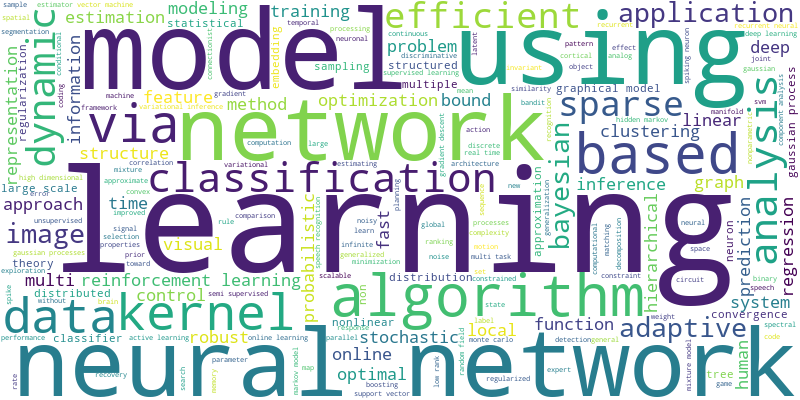

In [22]:
import wordcloud 

long_string = ' '.join(papers['title_processed'])
# creating word cloud
wc = wordcloud.WordCloud(width=800, height=400, background_color='white', colormap='viridis', random_state=42)
wc.generate(long_string)
wc.to_image()


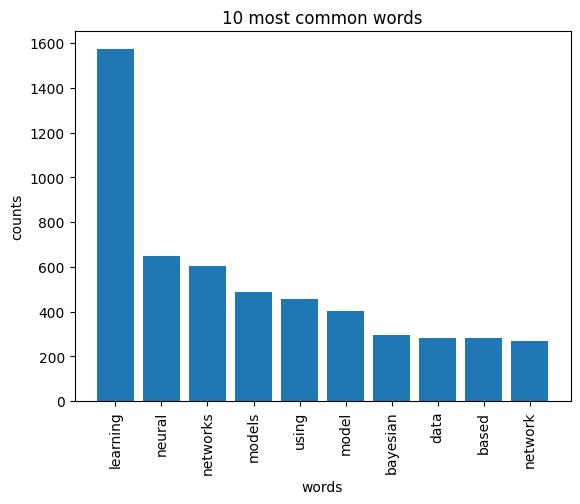

In [28]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)


#### Analizing trends with LDA 

In [34]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        

# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
learning gaussian process gradient stochastic online optimization variational processes bayesian

Topic #1:
learning neural networks model multi using matrix network optimization time

Topic #2:
learning reinforcement multiple active modeling rank random model hierarchical models

Topic #3:
learning supervised deep sparse analysis semi kernel recognition bayesian data

Topic #4:
high learning model dimensional prediction inference data selection optimal information

Topic #5:
learning kernels latent spectral natural model clustering generative models adversarial

Topic #6:
learning non robust markov classification minimization maximum decision algorithms bounds

Topic #7:
programming generalization visual power function processing linear action dynamic model

Topic #8:
models bayesian inference graphical estimation neural sampling self using detection

Topic #9:
networks neural network learning recurrent vector training models machines support


#### Machine learning's popularity has surged in recent years, evident from the exponential rise in NIPS conference papers. The demand to integrate machine learning into products and services is growing. While this analysis focused on research trends, many of these techniques are swiftly adopted in industry. As a data scientist, staying updated with the latest trends is vital, and continuous learning through blogs, tutorials, and courses is recommended. Embracing the evolving landscape of machine learning opens doors to innovative opportunities.